Link Referensi Dataset :https://www.kaggle.com/datasets/abhay06102003/weather-recognizer-with-cnn

Dataset yang digunakan bersumber dari Kaggle dan terdiri dari 768 gambar kondisi cuaca. Pada dataset ini, gambar  dibagi menjadi 3 kelas, yaitu shine, cloudy dan rainy.

# Prediksi Kondisi Cuaca Berdasarkan Citra Langit Menggunakan Convolutional Neural Network (CNN)

# Data Collection

In [1]:
# Install Kaggle CLI
!pip install -q kaggle

# Upload kaggle.json API token
from google.colab import files
files.upload()  # Pilih file kaggle.json yang didownload dari akun kamu di Kaggle

# Pindahkan kaggle.json ke folder yang sesuai dan set permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset dari Kaggle
!kaggle datasets download -d abhay06102003/weather-recognizer-with-cnn

# Ekstrak file zip
!unzip -q weather-recognizer-with-cnn.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/abhay06102003/weather-recognizer-with-cnn
License(s): unknown
  0% 0.00/48.4M [00:00<?, ?B/s]
100% 48.4M/48.4M [00:00<00:00, 1.37GB/s]


In [2]:
import os

# Path ke dataset
dataset_dir = 'dataset2'

# Mengecek jumlah gambar di setiap kelas
class_counts = {cls: len(os.listdir(os.path.join(dataset_dir, cls)))
                for cls in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, cls))}

# Menampilkan hasil
print("Jumlah data per kelas:")
for cls, count in class_counts.items():
    print(f"{cls}: {count} gambar")

Jumlah data per kelas:
clody: 300 gambar
rainy: 215 gambar
shine: 253 gambar


# Data Preprocessing

In [5]:
import os, shutil
from sklearn.model_selection import train_test_split

dataset_dir = 'dataset2'
train_dir = 'weather_train'
val_dir = 'weather_test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

        all_images = os.listdir(class_path)
        train_images, val_images = train_test_split(all_images, test_size=0.2, random_state=42)

        for img in train_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))
        for img in val_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))

print("Dataset berhasil dibagi menjadi data training dan data validation!")

Dataset berhasil dibagi menjadi data training dan data validation!


In [6]:
import os

def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Path ke folder training dan validation
train_dir = 'weather_train'
test_dir = 'weather_test'

# Hitung jumlah gambar per kelas
train_counts = count_images_per_class(train_dir)
val_counts = count_images_per_class(test_dir)

# Tampilkan hasil
print("Jumlah data per kelas (Training):")
for cls, count in train_counts.items():
    print(f"{cls}: {count} gambar")

print("\nJumlah data per kelas (Validation):")
for cls, count in val_counts.items():
    print(f"{cls}: {count} gambar")


Jumlah data per kelas (Training):
clody: 240 gambar
rainy: 172 gambar
shine: 202 gambar

Jumlah data per kelas (Validation):
clody: 60 gambar
rainy: 43 gambar
shine: 51 gambar


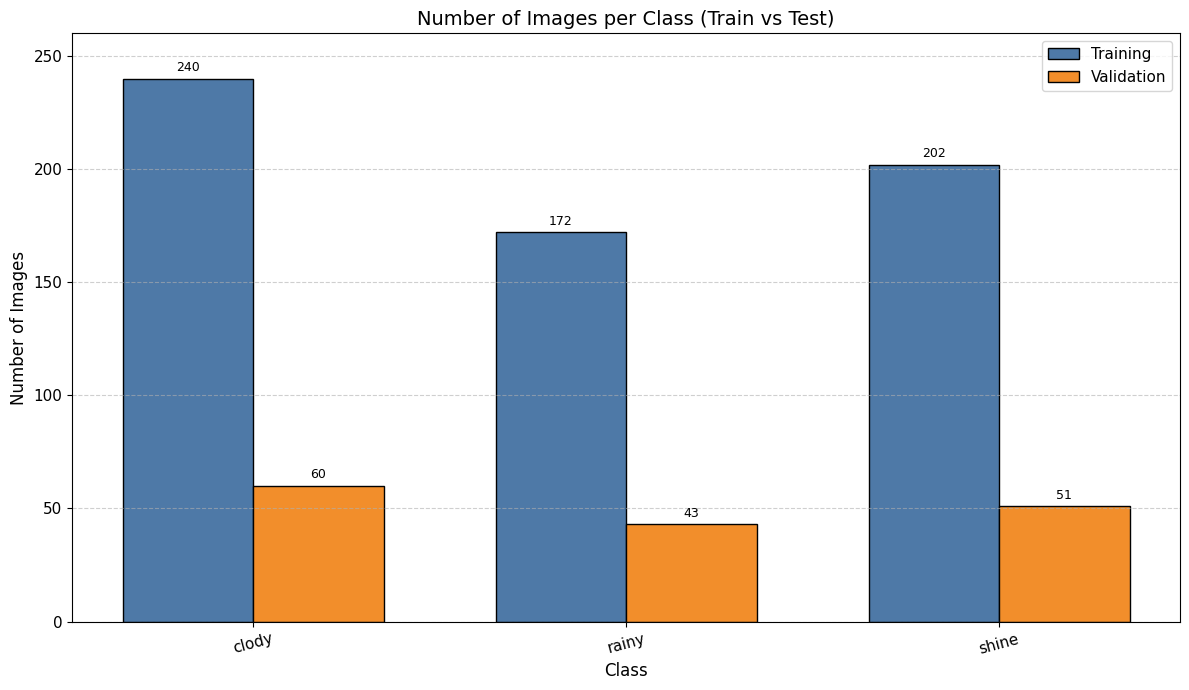

In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np

def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Path folder
train_dir = 'weather_train'
test_dir = 'weather_test'

train_counts = count_images_per_class(train_dir)
val_counts = count_images_per_class(test_dir)

# Data
classes = list(train_counts.keys())
train_values = [train_counts[cls] for cls in classes]
val_values = [val_counts[cls] for cls in classes]

x = np.arange(len(classes))
width = 0.35

# === Improved Plot ===
plt.figure(figsize=(12, 7))
bars1 = plt.bar(x - width/2, train_values, width, label='Training', color='#4e79a7', edgecolor='black')
bars2 = plt.bar(x + width/2, val_values, width, label='Validation', color='#f28e2b', edgecolor='black')

# Tambahkan angka di atas bar
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

# Labeling dan tata letak
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Number of Images per Class (Train vs Test)', fontsize=14)
plt.xticks(x, classes, rotation=15, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(fontsize=11)
plt.tight_layout()
plt.ylim(0, max(max(train_values), max(val_values)) + 20)  # supaya label tidak keluar

plt.show()


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
img_size = (150, 150)

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_gen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 614 images belonging to 3 classes.
Found 154 images belonging to 3 classes.


# Model Building

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

param_grid = {
    'conv_filters': [(32, 64), (64, 128), (32, 64, 128)],
    'dense_units': [64, 128],
    'dropout': [0.3, 0.5],
    'optimizer': ['adam', 'rmsprop']
}

results = []

for filters in param_grid['conv_filters']:
    for dense_units in param_grid['dense_units']:
        for dropout_rate in param_grid['dropout']:
            for opt_name in param_grid['optimizer']:
                print(f"\n🔄 Filters={filters}, Dense={dense_units}, Dropout={dropout_rate}, Optimizer={opt_name}")

                model = Sequential()
                model.add(Conv2D(filters[0], (3, 3), activation='relu', input_shape=(150, 150, 3)))
                model.add(MaxPooling2D(2, 2))
                model.add(Conv2D(filters[1], (3, 3), activation='relu'))
                model.add(MaxPooling2D(2, 2))
                if len(filters) == 3:
                    model.add(Conv2D(filters[2], (3, 3), activation='relu'))
                    model.add(MaxPooling2D(2, 2))
                model.add(Flatten())
                model.add(Dense(dense_units, activation='relu'))
                model.add(Dropout(dropout_rate))
                model.add(Dense(train_generator.num_classes, activation='softmax'))

                optimizer = Adam() if opt_name == 'adam' else RMSprop()
                model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

                history = model.fit(
                    train_generator,
                    epochs=15,
                    validation_data=test_generator,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
                    verbose=0
                )

                val_loss, val_acc = model.evaluate(test_generator, verbose=0)
                train_loss, train_acc = model.evaluate(train_generator, verbose=0)

                results.append({
                    'filters': filters,
                    'dense_units': dense_units,
                    'dropout': dropout_rate,
                    'optimizer': opt_name,
                    'val_acc': val_acc,
                    'train_acc': train_acc
                })

results_df = pd.DataFrame(results).sort_values(by='val_acc', ascending=False)
print("\n✅ Hasil terbaik:")
print(results_df.head(5))



🔄 Filters=(32, 64), Dense=64, Dropout=0.3, Optimizer=adam


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



🔄 Filters=(32, 64), Dense=64, Dropout=0.3, Optimizer=rmsprop

🔄 Filters=(32, 64), Dense=64, Dropout=0.5, Optimizer=adam

🔄 Filters=(32, 64), Dense=64, Dropout=0.5, Optimizer=rmsprop

🔄 Filters=(32, 64), Dense=128, Dropout=0.3, Optimizer=adam

🔄 Filters=(32, 64), Dense=128, Dropout=0.3, Optimizer=rmsprop

🔄 Filters=(32, 64), Dense=128, Dropout=0.5, Optimizer=adam

🔄 Filters=(32, 64), Dense=128, Dropout=0.5, Optimizer=rmsprop

🔄 Filters=(64, 128), Dense=64, Dropout=0.3, Optimizer=adam

🔄 Filters=(64, 128), Dense=64, Dropout=0.3, Optimizer=rmsprop

🔄 Filters=(64, 128), Dense=64, Dropout=0.5, Optimizer=adam

🔄 Filters=(64, 128), Dense=64, Dropout=0.5, Optimizer=rmsprop

🔄 Filters=(64, 128), Dense=128, Dropout=0.3, Optimizer=adam

🔄 Filters=(64, 128), Dense=128, Dropout=0.3, Optimizer=rmsprop

🔄 Filters=(64, 128), Dense=128, Dropout=0.5, Optimizer=adam

🔄 Filters=(64, 128), Dense=128, Dropout=0.5, Optimizer=rmsprop

🔄 Filters=(32, 64, 128), Dense=64, Dropout=0.3, Optimizer=adam

🔄 Filters=

# Model Training

In [11]:
best = results_df.iloc[0]

print("\n🔥 Melatih ulang model terbaik...")
model = Sequential()
model.add(Conv2D(best['filters'][0], (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(best['filters'][1], (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
if len(best['filters']) == 3:
    model.add(Conv2D(best['filters'][2], (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(best['dense_units'], activation='relu'))
model.add(Dropout(best['dropout']))
model.add(Dense(train_generator.num_classes, activation='softmax'))

optimizer = Adam() if best['optimizer'] == 'adam' else RMSprop()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

model.save('model_cuaca_terbaik.h5')



🔥 Melatih ulang model terbaik...
Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 347ms/step - accuracy: 0.4564 - loss: 3.1804 - val_accuracy: 0.7857 - val_loss: 0.7551
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 242ms/step - accuracy: 0.6991 - loss: 0.7623 - val_accuracy: 0.7727 - val_loss: 0.6494
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 268ms/step - accuracy: 0.7368 - loss: 0.6312 - val_accuracy: 0.7532 - val_loss: 0.6759
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 234ms/step - accuracy: 0.7821 - loss: 0.5627 - val_accuracy: 0.8052 - val_loss: 0.5386
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 298ms/step - accuracy: 0.8233 - loss: 0.5011 - val_accuracy: 0.8117 - val_loss: 0.4913
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 238ms/step - accuracy: 0.8003 - loss: 0.5378 - val_accuracy: 0.7792 - val_loss: 0.5396
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 286ms/step - accuracy: 0.8122 - loss: 0.4460 - val_accuracy: 0.8312 - val_loss: 0.4705
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 261ms/step - accuracy: 0.764

# Model Evaluation

In [13]:
# Evaluasi
train_loss, train_acc = model.evaluate(train_generator)
val_loss, val_acc = model.evaluate(test_generator)
print(f"Train acc: {train_acc*100:.2f}% | loss: {train_loss:.4f}")
print(f"Val acc: {val_acc*100:.2f}% | loss: {val_loss:.4f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - accuracy: 0.8855 - loss: 0.2641
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.8764 - loss: 0.3682
Train acc: 90.39% | loss: 0.2450
Val acc: 86.36% | loss: 0.3636


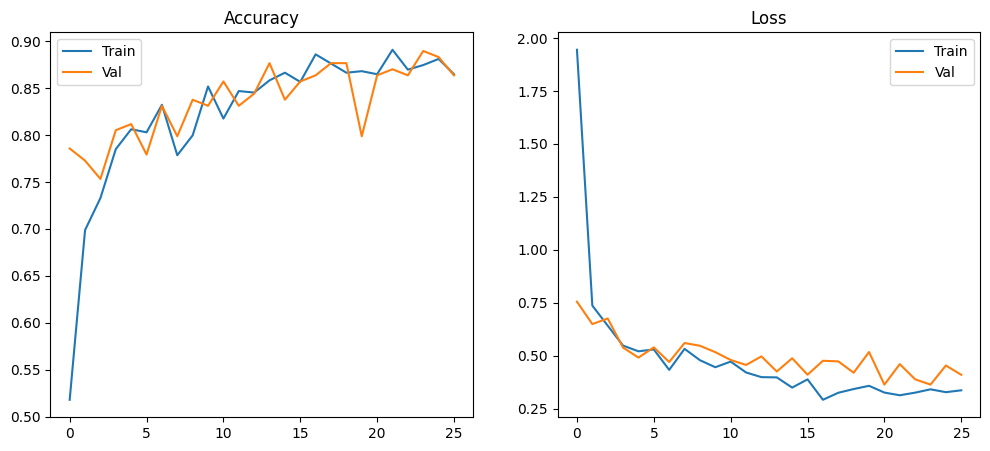

In [14]:
import matplotlib.pyplot as plt

# Grafik
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss')
plt.legend()
plt.show()


# Model Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


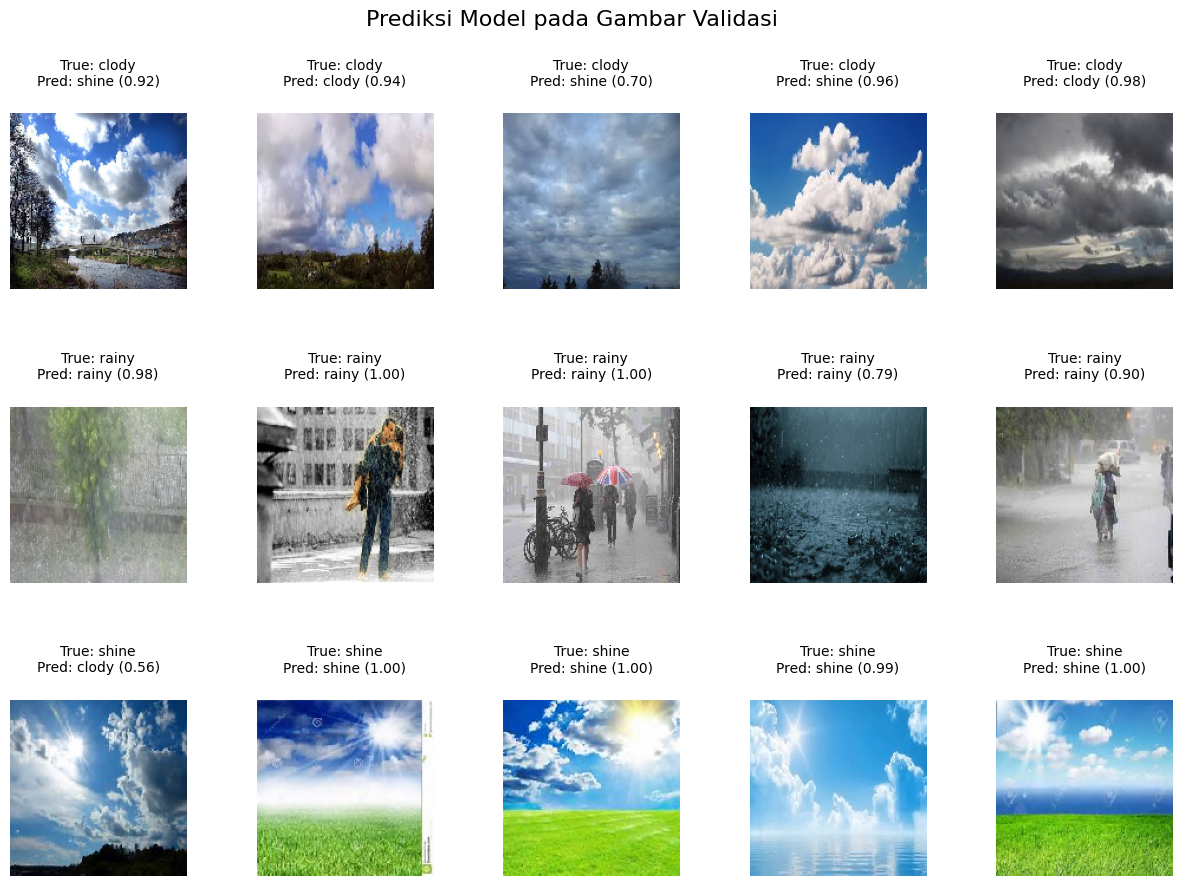

In [17]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Fungsi untuk memuat gambar dan melakukan prediksi
def load_and_predict(img_path, model, class_indices):
    # Memuat gambar dan melakukan preprocessing
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0  # Normalisasi piksel
    img_array = np.expand_dims(img_array, axis=0)

    # Prediksi kelas gambar
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Mapping label
    class_labels = list(class_indices.keys())
    return img, class_labels[predicted_class], max(prediction[0])

# Fungsi untuk menguji model pada sampel gambar dari direktori
def test_model_on_samples(directory, model, class_indices, num_images=5):
    plt.figure(figsize=(15, 10))
    classes = sorted(os.listdir(directory))  # Sort agar urut

    for i, class_name in enumerate(classes):
        class_dir = os.path.join(directory, class_name)
        images = os.listdir(class_dir)[:num_images]  # Ambil beberapa gambar per kelas

        for j, img_name in enumerate(images):
            img_path = os.path.join(class_dir, img_name)
            img, predicted_label, confidence = load_and_predict(img_path, model, class_indices)

            # Plot gambar dan hasil prediksi
            ax = plt.subplot(len(classes), num_images, i * num_images + j + 1)
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(f"True: {class_name}\nPred: {predicted_label} ({confidence:.2f})",
                         fontsize=10, pad=20)

    plt.subplots_adjust(hspace=0.6, wspace=0.4)
    plt.suptitle("Prediksi Model pada Gambar Validasi", fontsize=16)
    plt.show()

# Menjalankan fungsi prediksi
test_model_on_samples('weather_test', model, train_generator.class_indices)


Saving cloudy1.jpg to cloudy1 (1).jpg
Label kelas: ['clody', 'rainy', 'shine']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


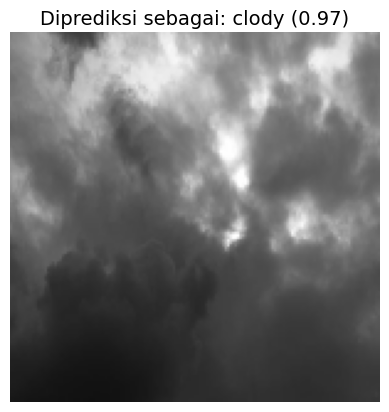

In [19]:
from google.colab import files
uploaded = files.upload()  # Upload gambar dari komputermu (misalnya: sunny.jpg, rainy.jpg, dst.)

# ==============================
# 📦 Load Model dan Kelas Target
# ==============================
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load model yang sudah disimpan dari hasil pelatihan sebelumnya
model = load_model('model_cuaca_terbaik.h5')

# Ambil label kelas dari train_generator
class_labels = list(train_generator.class_indices.keys())
print("Label kelas:", class_labels)

# =====================================
# 🔍 Prediksi Gambar yang Diupload User
# =====================================
# Ambil nama file yang baru di-upload
img_name = list(uploaded.keys())[0]

# Proses preprocessing gambar
img_path = img_name
img = image.load_img(img_path, target_size=(150, 150))  # Ukuran sesuai model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalisasi piksel

# Lakukan prediksi
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
predicted_label = class_labels[predicted_class_index]
confidence = predictions[0][predicted_class_index]  # Nilai probabilitas prediksi

# ====================
# 🎨 Tampilkan Gambar
# ====================
plt.imshow(img)
plt.axis('off')
plt.title(f'Diprediksi sebagai: {predicted_label} ({confidence:.2f})', fontsize=14)
plt.show()

Saving rain11.jpg to rain11.jpg
Label kelas: ['clody', 'rainy', 'shine']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


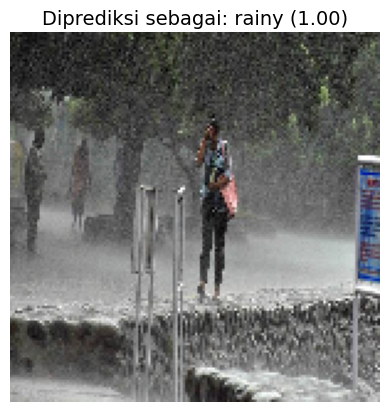

In [20]:
from google.colab import files
uploaded = files.upload()  # Upload gambar dari komputermu (misalnya: sunny.jpg, rainy.jpg, dst.)

# ==============================
# 📦 Load Model dan Kelas Target
# ==============================
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load model yang sudah disimpan dari hasil pelatihan sebelumnya
model = load_model('model_cuaca_terbaik.h5')

# Ambil label kelas dari train_generator
class_labels = list(train_generator.class_indices.keys())
print("Label kelas:", class_labels)

# =====================================
# 🔍 Prediksi Gambar yang Diupload User
# =====================================
# Ambil nama file yang baru di-upload
img_name = list(uploaded.keys())[0]

# Proses preprocessing gambar
img_path = img_name
img = image.load_img(img_path, target_size=(150, 150))  # Ukuran sesuai model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalisasi piksel

# Lakukan prediksi
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
predicted_label = class_labels[predicted_class_index]
confidence = predictions[0][predicted_class_index]  # Nilai probabilitas prediksi

# ====================
# 🎨 Tampilkan Gambar
# ====================
plt.imshow(img)
plt.axis('off')
plt.title(f'Diprediksi sebagai: {predicted_label} ({confidence:.2f})', fontsize=14)
plt.show()

Saving shine55.jpg to shine55.jpg
Label kelas: ['clody', 'rainy', 'shine']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


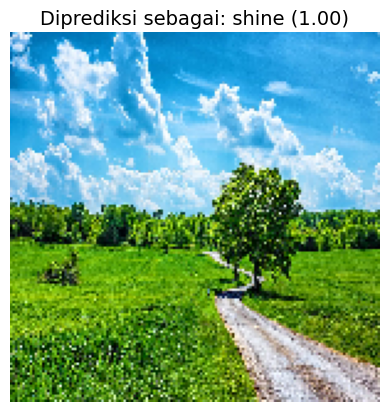

In [21]:
from google.colab import files
uploaded = files.upload()  # Upload gambar dari komputermu (misalnya: sunny.jpg, rainy.jpg, dst.)

# ==============================
# 📦 Load Model dan Kelas Target
# ==============================
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load model yang sudah disimpan dari hasil pelatihan sebelumnya
model = load_model('model_cuaca_terbaik.h5')

# Ambil label kelas dari train_generator
class_labels = list(train_generator.class_indices.keys())
print("Label kelas:", class_labels)

# =====================================
# 🔍 Prediksi Gambar yang Diupload User
# =====================================
# Ambil nama file yang baru di-upload
img_name = list(uploaded.keys())[0]

# Proses preprocessing gambar
img_path = img_name
img = image.load_img(img_path, target_size=(150, 150))  # Ukuran sesuai model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalisasi piksel

# Lakukan prediksi
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
predicted_label = class_labels[predicted_class_index]
confidence = predictions[0][predicted_class_index]  # Nilai probabilitas prediksi

# ====================
# 🎨 Tampilkan Gambar
# ====================
plt.imshow(img)
plt.axis('off')
plt.title(f'Diprediksi sebagai: {predicted_label} ({confidence:.2f})', fontsize=14)
plt.show()

# Simpan Model

In [22]:
model.save('weather_model.h5')

In [23]:
from google.colab import files
files.download('weather_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>